#For dataset download

In [1]:
import torch
print(torch.version.cuda)          # Should show 12.6
print(torch.cuda.is_available())   # Should return True

12.6
True


In [ ]:
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [03:59<00:00, 23.8MB/s]
100% 5.20G/5.20G [03:59<00:00, 23.3MB/s]


In [ ]:
!unzip skin-cancer-mnist-ham10000.zip -d ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000/ham10000_images_part_2/ISIC_002

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


C:\Users\prosh\AppData\Local\Temp\ipykernel_6800\2072760233.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


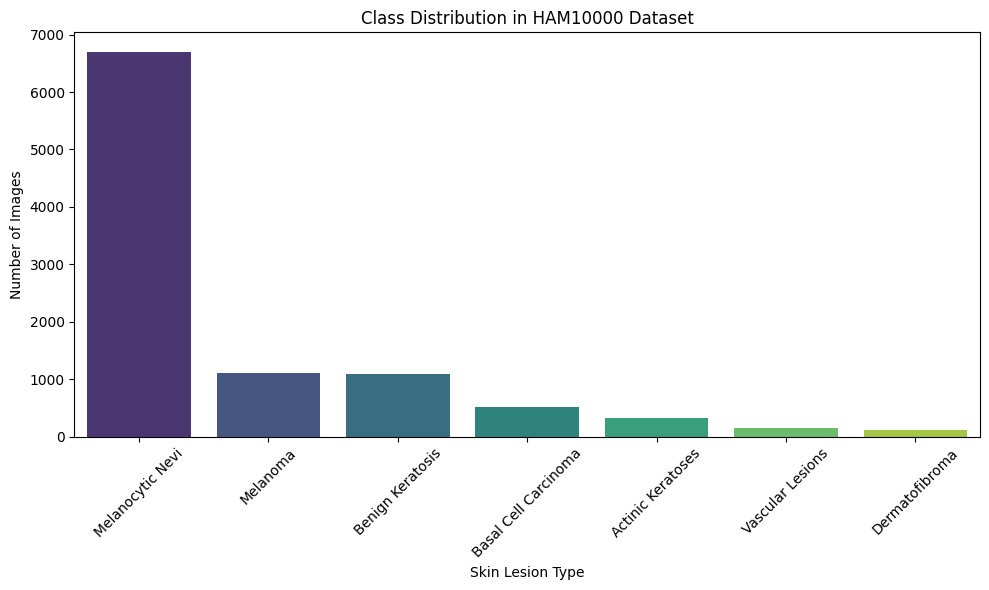

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metadata CSV file
metadata_path = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display first few rows to understand the structure
print(metadata.head())

# Class distribution
class_counts = metadata['dx'].value_counts()

# Mapping class codes to full names for better visualization
class_labels = {
    'akiec': 'Actinic Keratoses',
    'bcc': 'Basal Cell Carcinoma',
    'bkl': 'Benign Keratosis',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi',
    'vasc': 'Vascular Lesions',
    'mel': 'Melanoma'
}

# Map codes to labels
class_counts.index = class_counts.index.map(class_labels)   

# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

plt.title('Class Distribution in HAM10000 Dataset')
plt.xlabel('Skin Lesion Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
!kaggle datasets download -d tschandl/ham10000-lesion-segmentations

Dataset URL: https://www.kaggle.com/datasets/tschandl/ham10000-lesion-segmentations
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 97% 10.0M/10.3M [00:01<00:00, 14.3MB/s]
100% 10.3M/10.3M [00:01<00:00, 9.60MB/s]


In [ ]:
!unzip /content/ham10000-lesion-segmentations.zip -d ham10000_segmentations

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029321_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029322_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029323_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029324_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029325_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029326_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029327_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029328_segmentation.png  
  inflating: ham10000_segmentations/HAM10000_segmentations_lesion_tschandl/ISIC_0029329_segme

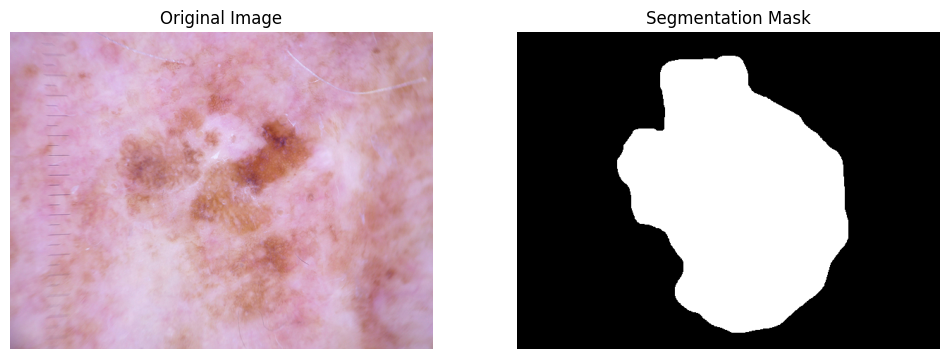

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Paths to the original images and segmentation masks
original_images_path = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_images_part_1'
masks_path = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000_segmentations_lesion_tschandl'

# Example image filename (without extension)
image_filename = 'ISIC_0027419'

# Load the original image
original_image = mpimg.imread(os.path.join(original_images_path, image_filename + '.jpg'))

# Load the corresponding segmentation mask
mask_image = mpimg.imread(os.path.join(masks_path, image_filename + '_segmentation.png'))

# Plot the original image and its segmentation mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.show()


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
Using image: ISIC_0027419


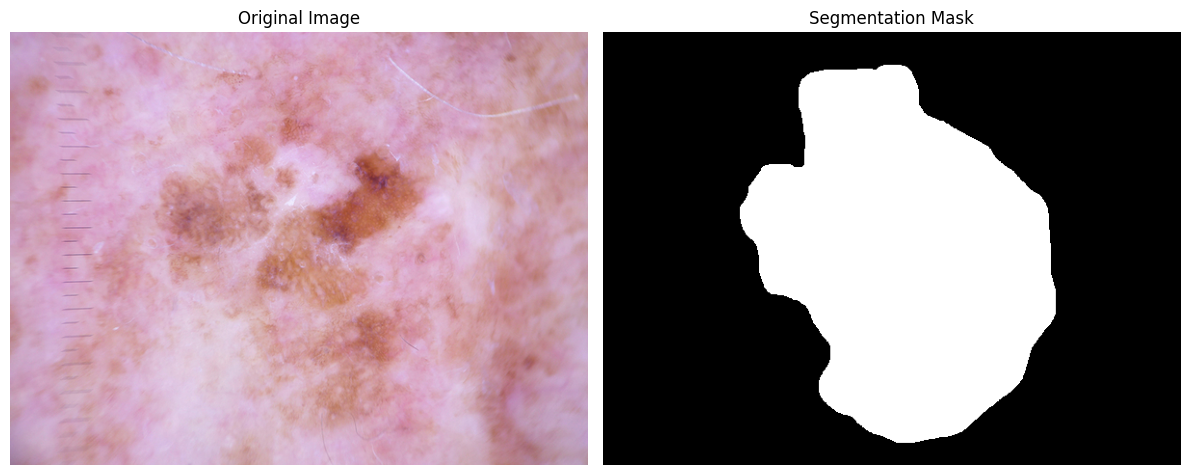

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# -----------------------------
# 1. Load the Metadata File
# -----------------------------
metadata_path = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display first few rows to verify
print(metadata.head())

# -----------------------------
# 2. Select an Image from Metadata
# -----------------------------
# Select the first image as an example
sample = metadata.iloc[0]
image_id = sample['image_id']
print(f"Using image: {image_id}")

# -----------------------------
# 3. Define Paths for Original Images and Segmentation Masks
# -----------------------------
# The original images are split between part_1 and part_2 folders.
image_found = False

# Check in both parts to find the image
for folder in ['HAM10000_images_part_1', 'HAM10000_images_part_2']:
    image_path = os.path.join(r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000', folder, image_id + '.jpg')
    if os.path.exists(image_path):
        original_image_file = image_path
        image_found = True
        break

if not image_found:
    raise FileNotFoundError(f"Original image {image_id}.jpg not found in both parts.")

# Segmentation mask path
mask_image_file = os.path.join(r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000_segmentations_lesion_tschandl', image_id + '_segmentation.png')

# -----------------------------
# 4. Load and Display the Images
# -----------------------------
# Load the original image
original_image = mpimg.imread(original_image_file)

# Load the segmentation mask
if not os.path.exists(mask_image_file):
    raise FileNotFoundError(f"Segmentation mask file not found: {mask_image_file}")
mask_image = mpimg.imread(mask_image_file)

# Display both images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import random

# Paths
image_dirs = [r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_images_part_1',
              r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_images_part_2']
mask_dir = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000_segmentations_lesion_tschandl'
metadata_path = r'C:\profolders\Collage stuff\Sem 4 project\DL\Datasets\HAM10000\HAM10000_metadata.csv'

# Constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 16

# Load metadata
metadata = pd.read_csv(metadata_path)
image_ids = metadata['image_id'].values

# Synchronized Transformations
class SynchronizedTransform:
    def __init__(self, flip_prob=0.5, rotation_degrees=(0, 90, 180, 270)):
        self.flip_prob = flip_prob
        self.rotation_degrees = rotation_degrees

    def __call__(self, image, mask):
        # Random Horizontal Flip
        if random.random() < self.flip_prob:
            image = transforms.functional.hflip(image)
            mask = transforms.functional.hflip(mask)

        # Random Vertical Flip
        if random.random() < self.flip_prob:
            image = transforms.functional.vflip(image)
            mask = transforms.functional.vflip(mask)

        # Random Rotation
        angle = random.choice(self.rotation_degrees)
        image = transforms.functional.rotate(image, angle)
        mask = transforms.functional.rotate(mask, angle)

        return image, mask

# Custom Dataset
class HAM10000Dataset(Dataset):
    def __init__(self, image_ids, image_dirs, mask_dir, transform=None, sync_transform=None):
        self.image_dirs = image_dirs
        self.mask_dir = mask_dir
        self.transform = transform
        self.sync_transform = sync_transform

        # Filter valid image-mask pairs at initialization
        self.valid_ids = [img_id for img_id in image_ids if self.image_exists(img_id) and self.mask_exists(img_id)]

    def image_exists(self, image_id):
        return any(os.path.exists(os.path.join(dir, f"{image_id}.jpg")) for dir in self.image_dirs)

    def mask_exists(self, image_id):
        return os.path.exists(os.path.join(self.mask_dir, f"{image_id}_segmentation.png"))

    def load_image(self, image_id):
        for dir in self.image_dirs:
            path = os.path.join(dir, f"{image_id}.jpg")
            if os.path.exists(path):
                return Image.open(path).convert("RGB").resize(IMAGE_SIZE)
        return None

    def load_mask(self, image_id):
        mask_path = os.path.join(self.mask_dir, f"{image_id}_segmentation.png")
        if os.path.exists(mask_path):
            return Image.open(mask_path).convert("L").resize(IMAGE_SIZE)
        return None

    def __len__(self):
        return len(self.valid_ids)

    def __getitem__(self, idx):
        image_id = self.valid_ids[idx]
        image = self.load_image(image_id)
        mask = self.load_mask(image_id)

        # Apply synchronized transformations
        if self.sync_transform:
            image, mask = self.sync_transform(image, mask)

        # Apply basic transformations (ToTensor)
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
            mask = (mask > 0.5).float()  # Binarize mask

        return image, mask

# Transformations
basic_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Synchronized Transform
sync_transform = SynchronizedTransform(flip_prob=0.5)

# Create datasets
train_ids, val_ids = train_test_split(image_ids, test_size=0.2, random_state=42)

train_dataset = HAM10000Dataset(train_ids, image_dirs, mask_dir, transform=basic_transform, sync_transform=sync_transform)
val_dataset = HAM10000Dataset(val_ids, image_dirs, mask_dir, transform=basic_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

print(f"Loaded {len(train_dataset)} training samples and {len(val_dataset)} validation samples.")


Loaded 8012 training samples and 2003 validation samples.


In [6]:
import torch.nn as nn
import torch.nn.functional as F

# Define Convolution Block
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        return x

# Define Attention Gate
class AttentionGate(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super(AttentionGate, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = F.relu(g1 + x1)
        psi = self.psi(psi)
        return x * psi

# Define the Attention U-Net
class AttentionUNet(nn.Module):
    def __init__(self, img_ch=3, output_ch=1):
        super(AttentionUNet, self).__init__()

        # Encoder
        self.conv1 = ConvBlock(img_ch, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = ConvBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = ConvBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.conv4 = ConvBlock(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        self.conv5 = ConvBlock(512, 1024)

        # Decoder with Attention
        self.att4 = AttentionGate(512, 512, 256)
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = ConvBlock(1024, 512)

        self.att3 = AttentionGate(256, 256, 128)
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = ConvBlock(512, 256)

        self.att2 = AttentionGate(128, 128, 64)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = ConvBlock(256, 128)

        self.att1 = AttentionGate(64, 64, 32)
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = ConvBlock(128, 64)

        self.final = nn.Conv2d(64, output_ch, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.conv1(x)
        p1 = self.pool1(e1)

        e2 = self.conv2(p1)
        p2 = self.pool2(e2)

        e3 = self.conv3(p2)
        p3 = self.pool3(e3)

        e4 = self.conv4(p3)
        p4 = self.pool4(e4)

        e5 = self.conv5(p4)

        # Decoder with Attention
        d4 = self.up4(e5)
        x4 = self.att4(g=d4, x=e4)
        d4 = torch.cat((x4, d4), dim=1)
        d4 = self.dec4(d4)

        d3 = self.up3(d4)
        x3 = self.att3(g=d3, x=e3)
        d3 = torch.cat((x3, d3), dim=1)
        d3 = self.dec3(d3)

        d2 = self.up2(d3)
        x2 = self.att2(g=d2, x=e2)
        d2 = torch.cat((x2, d2), dim=1)
        d2 = self.dec2(d2)

        d1 = self.up1(d2)
        x1 = self.att1(g=d1, x=e1)
        d1 = torch.cat((x1, d1), dim=1)
        d1 = self.dec1(d1)

        output = torch.sigmoid(self.final(d1))
        return output

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AttentionUNet().to(device)
print(model)
print(f"Model loaded on {device}.")


AttentionUNet(
  (conv1): ConvBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): ConvBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): ConvBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), strid

In [7]:
def dice_coefficient(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def iou_score(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def pixel_accuracy(pred, target):
    pred = pred.view(-1)
    target = target.view(-1)
    correct = (pred == target).sum().item()
    total = target.size(0)
    return correct / total


In [10]:
import torch.optim as optim
import os

# Dice Coefficient and Loss
def dice_coefficient(pred, target, smooth=1e-6):
    pred_flat = pred.view(-1)
    target_flat = target.view(-1)
    intersection = (pred_flat * target_flat).sum()
    return (2. * intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)

class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, pred, target):
        return 1 - dice_coefficient(pred, target)

# Loss and Optimizer
criterion = DiceLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

average_loss_list = []
average_dice_list = []
average_iou_list = []
average_pixel_acc_list = []

# Training loop
num_epochs = 200
checkpoint_path = 'attention_unet_checkpoint.pth'

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    dice_scores = []
    iou_scores = []
    pixel_accuracies = []

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5  # Binarize predictions

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

        # Calculate metrics
        dice_scores.append(dice_coefficient(preds, masks).item())
        iou_scores.append(iou_score(preds, masks).item())
        pixel_accuracies.append(pixel_accuracy(preds, masks))  # Removed .item()

    avg_loss = train_loss / len(train_loader)
    avg_dice = sum(dice_scores) / len(dice_scores)
    avg_iou = sum(iou_scores) / len(iou_scores)
    avg_pixel_acc = sum(pixel_accuracies) / len(pixel_accuracies)
    average_loss_list.append(avg_loss)
    average_dice_list.append(avg_dice)
    average_iou_list.append(avg_iou)
    average_pixel_acc_list.append(avg_pixel_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Dice: {avg_dice:.4f}, IoU: {avg_iou:.4f}, Pixel Acc: {avg_pixel_acc:.4f}")

    # Save model every 10 epochs
    if (epoch + 1) % 10 == 0:
        if os.path.exists(checkpoint_path):
            os.remove(checkpoint_path)  # Delete previous checkpoint
        
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
        }, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch+1}")


Epoch [1/200], Loss: 0.2159, Dice: 0.4181, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [2/200], Loss: 0.1281, Dice: 0.4180, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [3/200], Loss: 0.1009, Dice: 0.4180, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [4/200], Loss: 0.0901, Dice: 0.4180, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [5/200], Loss: 0.0843, Dice: 0.4179, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [6/200], Loss: 0.0810, Dice: 0.4181, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [7/200], Loss: 0.0782, Dice: 0.4181, IoU: 0.2661, Pixel Acc: 0.2661
Epoch [8/200], Loss: 0.0765, Dice: 0.4181, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [9/200], Loss: 0.0748, Dice: 0.4180, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [10/200], Loss: 0.0734, Dice: 0.4181, IoU: 0.2660, Pixel Acc: 0.2660
Checkpoint saved at epoch 10
Epoch [11/200], Loss: 0.0733, Dice: 0.4181, IoU: 0.2660, Pixel Acc: 0.2660
Epoch [12/200], Loss: 0.0733, Dice: 0.4180, IoU: 0.2659, Pixel Acc: 0.2659
Epoch [13/200], Loss: 0.0706, Dice: 0.4179, IoU: 0.2659, Pixel Acc: 0.2659
Epoch

KeyboardInterrupt: 

In [16]:
import torch
import torch.optim as optim

# Load checkpoint
checkpoint_path = 'attention_unet_checkpoint.pth'
checkpoint = torch.load(checkpoint_path)

# Initialize model and optimizer
model = AttentionUNet().to(device)  # Replace with your actual model class
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Load the saved states
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']

# Set the model to training mode
model.train()

# Continue training from the saved epoch
num_epochs = 200  # Total epochs you want to train
for epoch in range(start_epoch, num_epochs):
    train_loss = 0
    dice_scores = []
    iou_scores = []
    pixel_accuracies = []

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5  # Binarize predictions

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

        # Calculate metrics
        dice_scores.append(dice_coefficient(preds, masks).item())
        iou_scores.append(iou_score(preds, masks).item())
        pixel_accuracies.append(pixel_accuracy(preds, masks))  # No .item() here

    avg_loss = train_loss / len(train_loader)
    avg_dice = sum(dice_scores) / len(dice_scores)
    avg_iou = sum(iou_scores) / len(iou_scores)
    avg_pixel_acc = sum(pixel_accuracies) / len(pixel_accuracies)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Dice: {avg_dice:.4f}, IoU: {avg_iou:.4f}, Pixel Acc: {avg_pixel_acc:.4f}")

    # Save checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
        }, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch+1}")

Epoch [171/200], Loss: 0.0386, Dice: 0.9494, IoU: 0.9045, Pixel Acc: 0.9737
Epoch [172/200], Loss: 0.0384, Dice: 0.9443, IoU: 0.8965, Pixel Acc: 0.9712
Epoch [173/200], Loss: 0.0383, Dice: 0.9479, IoU: 0.9020, Pixel Acc: 0.9729
Epoch [174/200], Loss: 0.0386, Dice: 0.9430, IoU: 0.8934, Pixel Acc: 0.9702
Epoch [175/200], Loss: 0.0388, Dice: 0.9471, IoU: 0.9007, Pixel Acc: 0.9726
Epoch [176/200], Loss: 0.0392, Dice: 0.9443, IoU: 0.8968, Pixel Acc: 0.9713
Epoch [177/200], Loss: 0.0382, Dice: 0.9526, IoU: 0.9101, Pixel Acc: 0.9752
Epoch [178/200], Loss: 0.0388, Dice: 0.9461, IoU: 0.8999, Pixel Acc: 0.9719
Epoch [179/200], Loss: 0.0382, Dice: 0.9450, IoU: 0.8975, Pixel Acc: 0.9714
Epoch [180/200], Loss: 0.0376, Dice: 0.9463, IoU: 0.8995, Pixel Acc: 0.9722
Checkpoint saved at epoch 180
Epoch [181/200], Loss: 0.0377, Dice: 0.9515, IoU: 0.9089, Pixel Acc: 0.9748
Epoch [182/200], Loss: 0.0374, Dice: 0.9514, IoU: 0.9083, Pixel Acc: 0.9746
Epoch [183/200], Loss: 0.0376, Dice: 0.9496, IoU: 0.9055, 

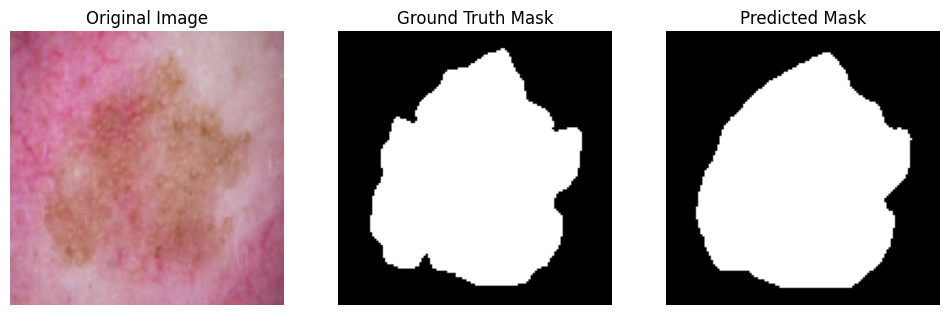

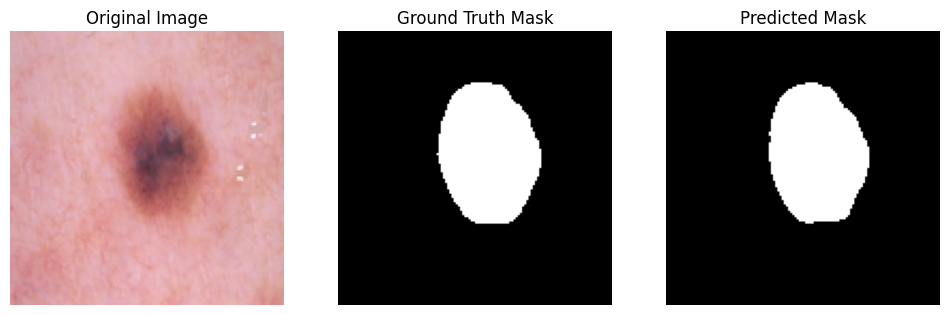

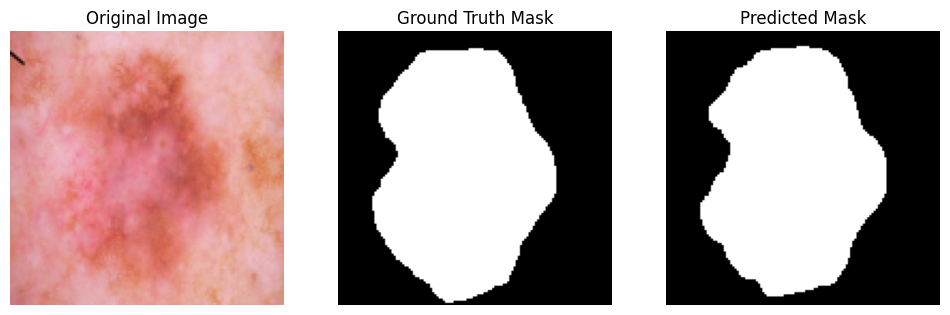

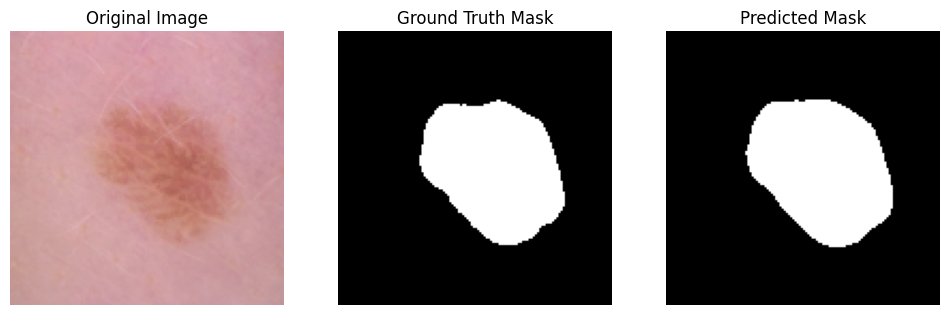

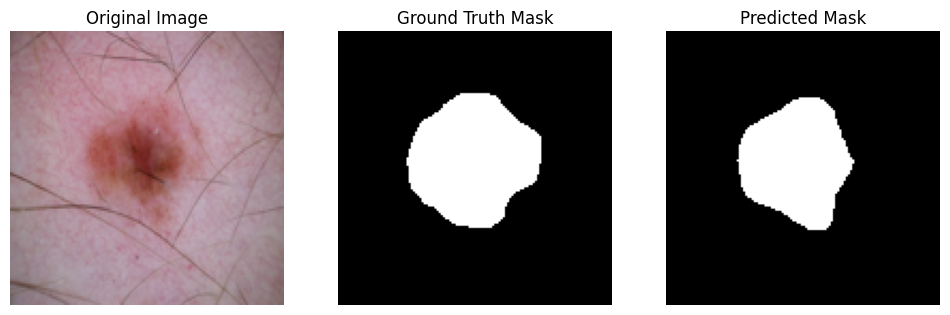

In [12]:
import matplotlib.pyplot as plt

def visualize_predictions(model, loader, num_images=5):
    model.eval()
    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            outputs = model(images)
            outputs = (outputs > 0.5).float()

            for i in range(num_images):
                plt.figure(figsize=(12, 4))

                # Original Image
                plt.subplot(1, 3, 1)
                plt.imshow(images[i].cpu().permute(1, 2, 0))
                plt.title('Original Image')
                plt.axis('off')

                # Ground Truth
                plt.subplot(1, 3, 2)
                plt.imshow(masks[i].cpu().squeeze(), cmap='gray')
                plt.title('Ground Truth Mask')
                plt.axis('off')

                # Predicted Mask
                plt.subplot(1, 3, 3)
                plt.imshow(outputs[i].cpu().squeeze(), cmap='gray')
                plt.title('Predicted Mask')
                plt.axis('off')

                plt.show()
            break

# Visualize some predictions
visualize_predictions(model, val_loader)


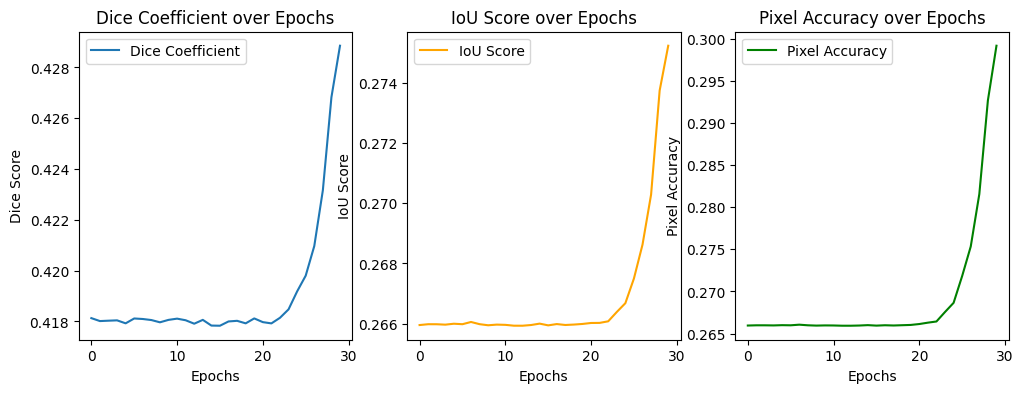

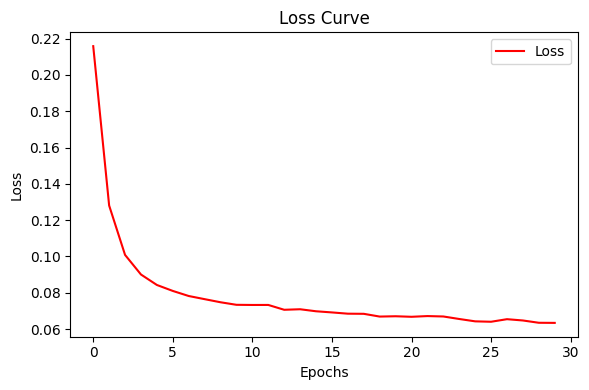

In [17]:
import matplotlib.pyplot as plt

# Assuming you stored metrics in lists
epochs_range = range(30)
plt.figure(figsize=(12, 4))

# Dice Coefficient
plt.subplot(1, 3, 1)
plt.plot(epochs_range, average_dice_list, label='Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Score')
plt.title('Dice Coefficient over Epochs')
plt.legend()

# IoU Score
plt.subplot(1, 3, 2)
plt.plot(epochs_range, average_iou_list, label='IoU Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.title('IoU Score over Epochs')
plt.legend()

# Pixel Accuracy
plt.subplot(1, 3, 3)
plt.plot(epochs_range, average_pixel_acc_list, label='Pixel Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Pixel Accuracy')
plt.title('Pixel Accuracy over Epochs')
plt.legend()

# Loss Curve
plt.figure(figsize=(6, 4))
plt.plot(epochs_range, average_loss_list, label='Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()


plt.tight_layout()
plt.show()

In [13]:
!dot -V

dot - graphviz version 12.2.1 (20241206.2353)


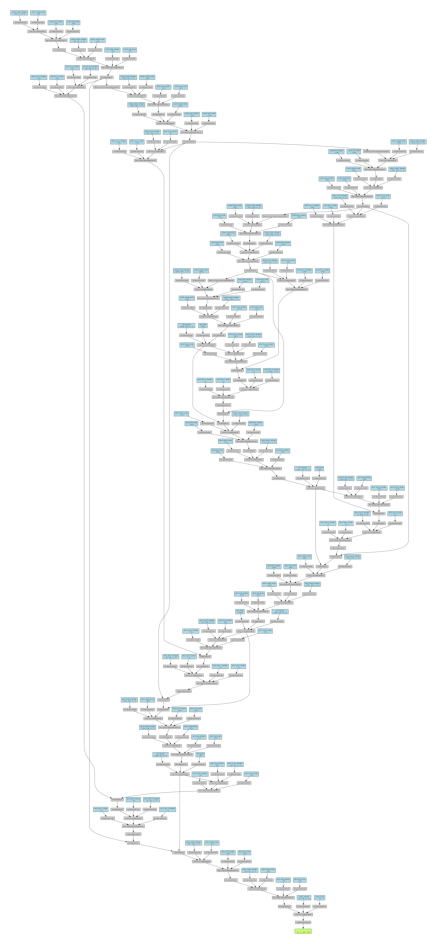

In [14]:
import torch
from torchviz import make_dot
from PIL import Image
import matplotlib.pyplot as plt

# Define your model here
model = AttentionUNet()
model.eval()

# Create a dummy input
dummy_input = torch.randn(1, 3, 128, 128)

# Forward pass
output = model(dummy_input)

# Visualize and save the architecture
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("attention_unet_architecture", format="png")

# Display the image
img = Image.open("attention_unet_architecture.png")
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.show()


In [18]:
# Save the entire model (architecture + weights)
torch.save(model, 'attention_unet_model_final.pth')

In [19]:
# Load the entire saved model
import torch
model = torch.load('attention_unet_model_final.pth', weights_only=False)
model.eval()

AttentionUNet(
  (conv1): ConvBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): ConvBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): ConvBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), strid